## **Loading Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from itertools import product
from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

## **Loading Dataset**

In [ ]:
df = pd.read_csv('/content/Updated_heart_failure_clinical_records_dataset.csv')
df.columns

Index(['Age', 'Anaemia', 'CPK', 'Diabetes', 'EF', 'HBP', 'Platelets', 'SC',
       'SS', 'Sex', 'Smoking', 'Time', 'DEATH_EVENT'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          299 non-null    float64
 1   Anaemia      299 non-null    int64  
 2   CPK          299 non-null    int64  
 3   Diabetes     299 non-null    int64  
 4   EF           299 non-null    int64  
 5   HBP          299 non-null    int64  
 6   Platelets    299 non-null    float64
 7   SC           299 non-null    float64
 8   SS           299 non-null    int64  
 9   Sex          299 non-null    int64  
 10  Smoking      299 non-null    int64  
 11  Time         299 non-null    int64  
 12  DEATH_EVENT  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.shape

(299, 13)

## **Data Preprocessing**

**Defiining Data Type**

In [ ]:
df['Anaemia'] = df['Anaemia'].astype('bool')
df['Diabetes'] = df['Diabetes'].astype('bool')
df['HBP'] = df['HBP'].astype('bool')
df['Sex'] = df['Sex'].astype('category')
df['Smoking'] = df['Smoking'].astype('bool')
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype('category')

In [ ]:
death = df[df['DEATH_EVENT']==1]
suurvived = df[df['DEATH_EVENT']==0]

In [ ]:
df.describe()

,Age,CPK,EF,Platelets,SC,SS,Time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [ ]:
death.describe()

,Age,CPK,EF,Platelets,SC,SS,Time
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,65.215281,670.197917,33.468750,256381.044792,1.835833,135.375000,70.885417
std,13.214556,1316.580640,12.525303,98525.682856,1.468562,5.001579,62.378281
min,42.000000,23.000000,14.000000,47000.000000,0.600000,116.000000,4.000000
25%,55.000000,128.750000,25.000000,197500.000000,1.075000,133.000000,25.500000
50%,65.000000,259.000000,30.000000,258500.000000,1.300000,135.500000,44.500000
75%,75.000000,582.000000,38.000000,311000.000000,1.900000,138.250000,102.250000
max,95.000000,7861.000000,70.000000,621000.000000,9.400000,146.000000,241.000000


In [ ]:
suurvived.describe()

,Age,CPK,EF,Platelets,SC,SS,Time
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,58.761906,540.054187,40.266010,266657.489901,1.184877,137.216749,158.339901
std,10.637890,753.799572,10.859963,97531.202283,0.654083,3.982923,67.742872
min,40.000000,30.000000,17.000000,25100.000000,0.500000,113.000000,12.000000
25%,50.000000,109.000000,35.000000,219500.000000,0.900000,135.500000,95.000000
50%,60.000000,245.000000,38.000000,263000.000000,1.000000,137.000000,172.000000
75%,65.000000,582.000000,45.000000,302000.000000,1.200000,140.000000,213.000000
max,90.000000,5209.000000,80.000000,850000.000000,6.100000,148.000000,285.000000


**Finding the number of occurences**

In [ ]:
len(death[death['Age']<50])

11

**Correlation with target variable**

In [ ]:
from scipy import stats
stats.ttest_ind(df['HBP'],df['DEATH_EVENT'])

TtestResult(statistic=0.7782029809583625, pvalue=0.43675818272737343, df=596.0)

**Handling Missing Values**

In [ ]:
df.isnull().sum()

,0
Age,0
Anaemia,0
CPK,0
Diabetes,0
EF,0
HBP,0
Platelets,0
SC,0
SS,0
Sex,0


**Number of patient who have survived**

In [ ]:
len(df[df['DEATH_EVENT']==0])

203

**Number of patient who have not survived**

In [ ]:
len(df[df['DEATH_EVENT']==1])

96

**Outlier Detection & Removal**

In [ ]:
df1 = df
''' Detection '''
# IQR
Q1 = np.percentile(df1['SS'], 25,
                   interpolation='midpoint')

Q3 = np.percentile(df1['SS'], 75,
                   interpolation='midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df1.shape)

# Upper bound
upper = np.where(df1['SS'] >= (Q3 + 1.5 * IQR))
# Lower bound
lower = np.where(df1['SS'] <= (Q1 - 1.5 * IQR))

''' Removing the Outliers '''
df1.drop(upper[0], inplace=True)
df1.drop(lower[0], inplace=True)

print("New Shape: ", df1.shape)

Old Shape:  (299, 13)
New Shape:  (294, 13)


## **Statistical Analysis**

**Heatmap with PValues**

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


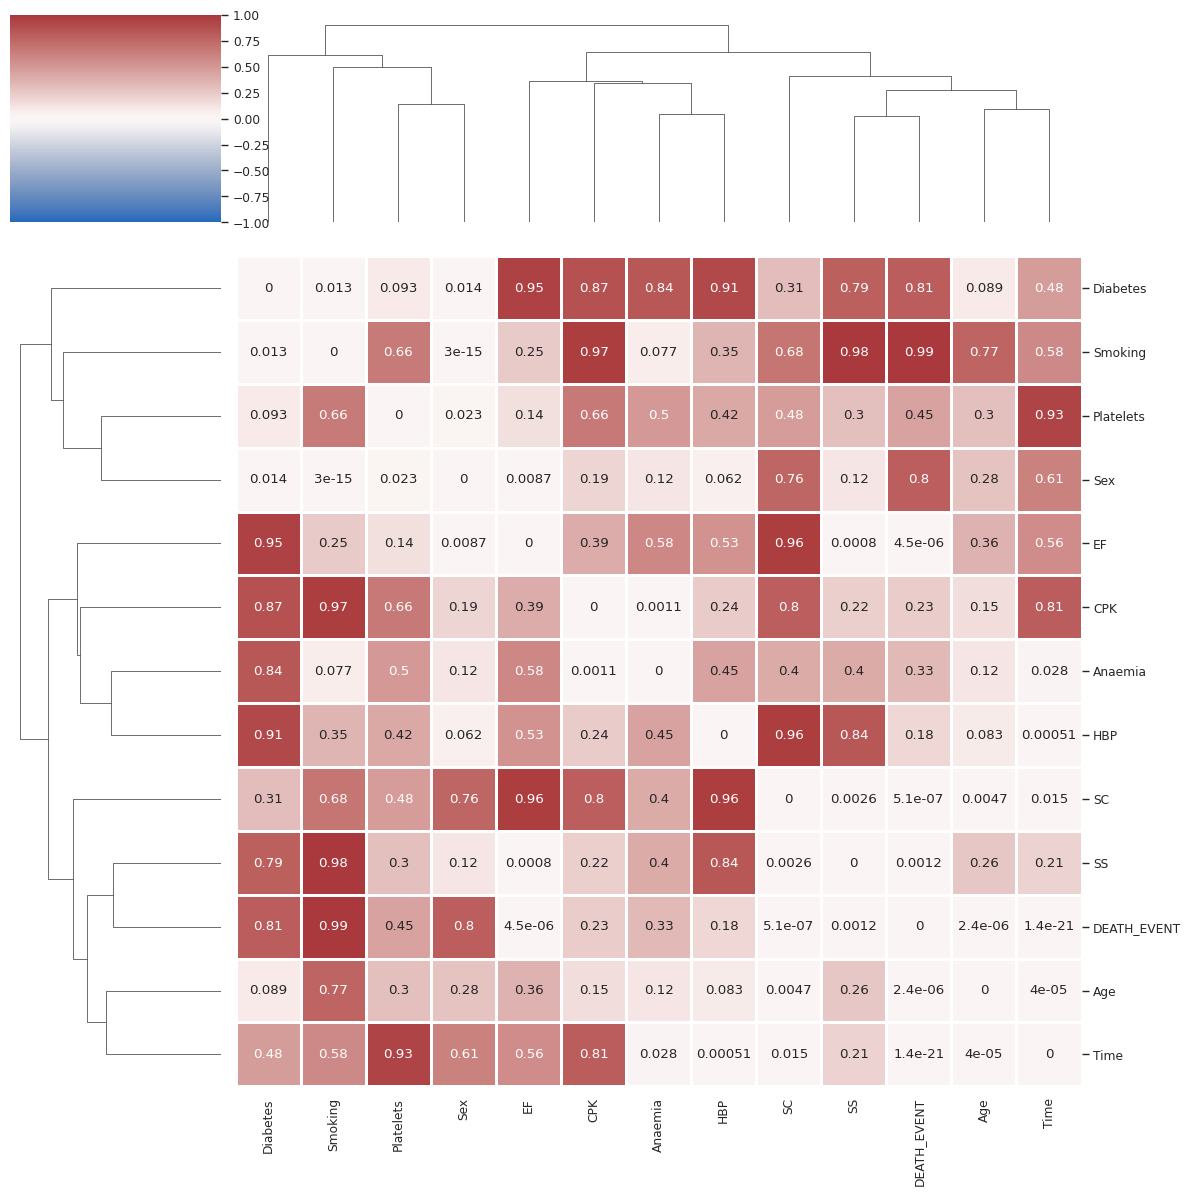

In [ ]:
df1 = df
df2 = df
def compute_corr_and_p(df1, df2):
  corrs = pd.DataFrame(index=df1.columns, columns=df2.columns, dtype=np.float64)
  pvals = corrs.copy()

  for i, j in product(df1.columns, df2.columns):
    corrs.loc[i,j], pvals.loc[i,j] = pearsonr(df1[i], df2[j])

  return corrs, pvals

def plot(corrs, pvals, siglevel=.01):
  mask = np.zeros_like(corrs, dtype=np.bool)
  mask[np.triu_indices_from(mask) | (pvals >= siglevel) ] = True

  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  sns.heatmap(pvals,  cmap=cmap, center=0, square=True, linewidths=.5,
           cbar_kws={'shrink': .5}, annot=True)
cor, p = compute_corr_and_p(df,df)
# g=sns.clustermap(p, cmap="YlGnBu", vmin=-1, vmax=1, annot=True)
# plot(cor, p, 0.01)
mask = np.invert(np.tril(p<0.05))
# fig = plt.figure(figsize=(4,4))
sns.clustermap(p, cmap="vlag", vmin=-1, vmax=1, annot=True, figsize=(12,12), linewidths=1, linecolor='w')
plt.xticks(weight='bold')
# for text in g.texts:
#     text.set_size(11)
#     if text.get_text() < '0.001':
#         text.set_text('*')
#         text.set_size(14)
#         text.set_weight('bold')

# Save a high-res copy of the image to disk
plt.tight_layout()
# plt.savefig("HF_clustermap.png", dpi=800)
# plt.savefig("HF_clustermap.pdf", dpi=800)

**Boxplot of the dataset to check data distribution before and after removal of outlier**

Index(['Age', 'Anaemia', 'CPK', 'Diabetes', 'EF', 'HBP', 'Platelets', 'SC',
       'SS', 'Sex', 'Smoking', 'Time', 'Target'],
      dtype='object')


<ipython-input-19-2bfb5e858419>:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


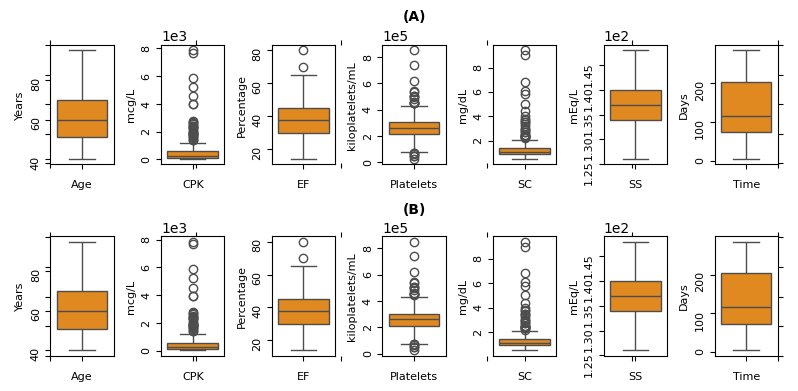

In [ ]:
# df1 = pd.read_csv('/content/OutlierFreeHF.csv')
df = df.rename(columns={'DEATH_EVENT': 'Target'})
print(df.columns)

fig, big_axes = plt.subplots(figsize=(8, 4), nrows=2, ncols=1)
# sns.set_style('darkgrid')
gs1 = gridspec.GridSpec(2, 7)
gs1.update(wspace=0.75, hspace=0.6)
for row, big_ax in enumerate(big_axes, start=1):
    if row == 1:
        big_ax.set_title("(A)\n", fontsize=10, weight='bold')
    if row == 2:
        big_ax.set_title("(B)\n", fontsize=10, weight='bold')

    # Turn off axis lines and ticks of the big subplot
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1., 1., 1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

for i in range(14):
    ax1 = fig.add_subplot(gs1[i])
    if i == 0:
        sns.boxplot(y=df['Age'], color='darkorange')
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('Age', fontsize=8)
        plt.ylabel("Years", fontsize=8)
    if i == 1:
        sns.boxplot(y=df['CPK'], color='darkorange')
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('CPK', fontsize=8)
        plt.ylabel("mcg/L", fontsize=8)
    if i == 2:
        sns.boxplot(y=df['EF'], color='darkorange')
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('EF', fontsize=8)
        plt.ylabel("Percentage", fontsize=8)
    if i == 3:
        sns.boxplot(y=df['Platelets'], color='darkorange')
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('Platelets', fontsize=8)
        plt.ylabel("kiloplatelets/mL", fontsize=8)
    if i == 4:
        sns.boxplot(y=df['SC'], color='darkorange')
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('SC', fontsize=8)
        plt.ylabel("mg/dL", fontsize=8)
    if i == 5:
        sns.boxplot(y=df['SS'], color='darkorange')
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('SS', fontsize=8)
        plt.ylabel("mEq/L", fontsize=8)
    if i == 6:
        sns.boxplot(y=df['Time'], color='darkorange')
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('Time', fontsize=8)
        plt.ylabel("Days", fontsize=8)
    if i == 7:
        sns.boxplot(y=df1['Age'], color='darkorange')
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('Age', fontsize=8)
        plt.ylabel("Years", fontsize=8)
    if i == 8:
        sns.boxplot(y=df1['CPK'], color='darkorange')
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('CPK', fontsize=8)
        plt.ylabel("mcg/L", fontsize=8)
    if i == 9:
        sns.boxplot(y=df1['EF'], color='darkorange')
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('EF', fontsize=8)
        plt.ylabel("Percentage", fontsize=8)
    if i == 10:
        sns.boxplot(y=df1['Platelets'], color='darkorange')
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('Platelets', fontsize=8)
        plt.ylabel("kiloplatelets/mL", fontsize=8)
    if i == 11:
        sns.boxplot(y=df1['SC'], color='darkorange')
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('SC', fontsize=8)
        plt.ylabel("mg/dL", fontsize=8)
    if i == 12:
        sns.boxplot(y=df1['SS'], color='darkorange')
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('SS', fontsize=8)
        plt.ylabel("mEq/L", fontsize=8)
    if i == 13:
        sns.boxplot(y=df1['Time'], color='darkorange')
        plt.yticks(rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.xlabel('Time', fontsize=8)
        plt.ylabel("Days", fontsize=8)

# fig.set_facecolor('w')
plt.tight_layout()
plt.savefig('UpdatedBoxplot2.pdf', dpi=800)
# df1.to_csv('D:/Thesis/Heart Disease/OutlierFreeHF.csv')
plt.show()


In [ ]:
df1 = df.rename(columns={'DEATH_EVENT': 'Target'})
df1['Target'] = df['Target'].replace([False],'Survived')
df1['Target'] = df['Target'].replace([True],'Dead')

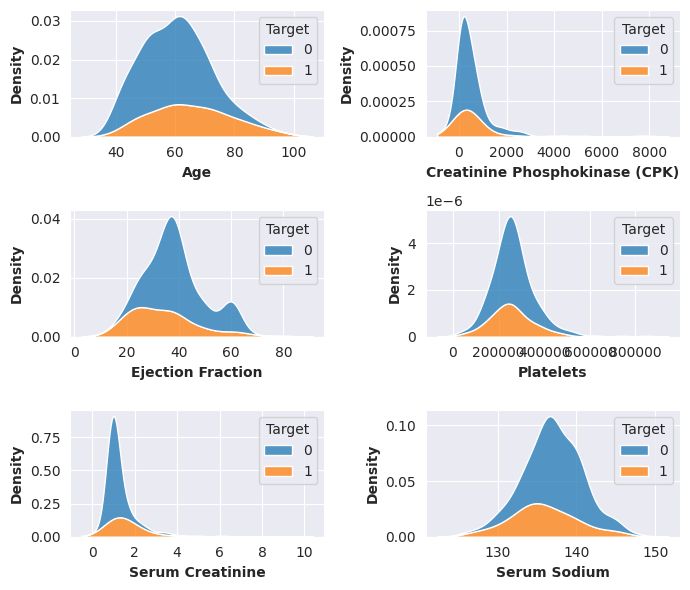

In [ ]:

fig = plt.figure(figsize=(7, 6))
sns.set_style('darkgrid')
ax = fig.add_subplot(3, 2, 1)
sns.kdeplot(data=df1, x='Age', hue='Target', multiple="stack")
plt.xlabel('Age', weight='bold')
plt.ylabel('Density', weight='bold')

ax = fig.add_subplot(3, 2, 2)
sns.kdeplot(data=df1, x='CPK', hue='Target', multiple="stack")
plt.xlabel('Creatinine Phosphokinase (CPK)', weight='bold')
plt.ylabel('Density', weight='bold')

ax = fig.add_subplot(3, 2, 3)
sns.kdeplot(data=df1, x='EF', hue='Target', multiple="stack")
plt.xlabel('Ejection Fraction', weight='bold')
plt.ylabel('Density', weight='bold')

ax = fig.add_subplot(3, 2, 4)
sns.kdeplot(data=df1, x='Platelets', hue='Target', multiple="stack")
plt.xlabel('Platelets', weight='bold')
plt.ylabel('Density', weight='bold')

ax = fig.add_subplot(3, 2, 5)
sns.kdeplot(data=df1, x='SC', hue='Target', multiple="stack")
plt.xlabel('Serum Creatinine', weight='bold')
plt.ylabel('Density', weight='bold')

ax1 = fig.add_subplot(3, 2, 6)

sns.kdeplot(data=df1, x='SS', hue='Target', multiple="stack")
plt.xlabel('Serum Sodium', weight='bold')
plt.ylabel('Density', weight='bold')
plt.tight_layout()
plt.savefig('KDEplot.pdf', dpi=800)

**Count Plot for Data Distribution**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


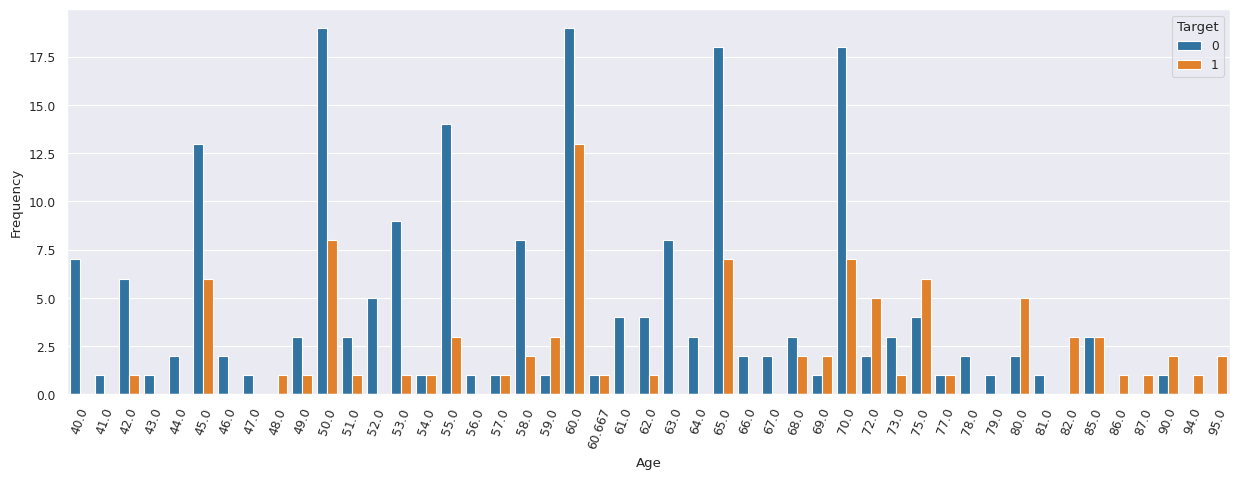

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(x="Age", data=df1, hue='Target')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tick_params(axis='x', rotation=70)
plt.savefig("abc.png", dpi=800)

#**Finding Association**

In [ ]:
dead= df[(df['DEATH_EVENT']==1)]
survived = df[(df['DEATH_EVENT']==0)]

**Age**

In [ ]:
median_of_age = df['Age'].median()
median_of_age

60.0

In [ ]:
median_age_dead = dead['Age'].median()
median_age_dead

65.0

In [ ]:
median_age_survived = survived['Age'].median()
median_age_survived

60.0

In [ ]:
Q1 = np.percentile(df['Age'], 25, interpolation = 'midpoint')
print(Q1)
Q3 = np.percentile(df['Age'], 75, interpolation = 'midpoint')
print(Q3)

51.0
70.0


In [ ]:
corr, pvalue = pearsonr(df['Anaemia'], df['DEATH_EVENT'])
pvalue

0.2532988145643658

**Dividing Categorial value**

In [ ]:
categorial = df['Anaemia'].astype('category')
categorial = pd.DataFrame(categorial)
categorial['Diabetes'] = df['Diabetes'].astype('category')
categorial['HBP'] = df['HBP'].astype('category')
categorial['Smoking'] = df['Smoking'].astype('category')
categorial['Sex'] = df['Sex'].astype('category')
categorial['DEATH_EVENT'] = df['DEATH_EVENT']
categorial.head()

,Anaemia,Diabetes,HBP,Smoking,Sex,DEATH_EVENT
0,False,False,True,False,1,1
1,False,False,False,False,1,1
2,False,False,False,True,1,1
3,True,False,False,False,1,1
4,True,True,False,False,0,1


**Dividing the categorial data who have not survived**

In [ ]:
categorial_survived = categorial[(categorial['DEATH_EVENT']==0)]
categorial_survived.head()

,Anaemia,Diabetes,HBP,Smoking,Sex,DEATH_EVENT
14,True,False,True,False,0,0
20,True,False,True,False,0,0
23,False,True,False,False,1,0
33,True,True,False,False,0,0
38,False,True,False,False,1,0


**Dividing the categorial data who have survived**

In [ ]:
categorial_dead = categorial[(categorial['DEATH_EVENT']==1)]
categorial_dead.head()

,Anaemia,Diabetes,HBP,Smoking,Sex,DEATH_EVENT
0,False,False,True,False,1,1
1,False,False,False,False,1,1
2,False,False,False,True,1,1
3,True,False,False,False,1,1
4,True,True,False,False,0,1


**Number of paitent positive by symptoms**



In [ ]:
anaemia_positive = len(categorial_dead[(categorial_dead['Anaemia']==1)])
anaemia_positive

0

In [ ]:
diabetes_positive = len(categorial_dead[(categorial_dead['Diabetes']==1)])
diabetes_positive

0

In [ ]:
high_blood_pressure_positive = len(categorial_dead[(categorial_dead['HBP']==1)])
high_blood_pressure_positive

0

In [ ]:
smoking_positive = len(categorial_dead[(categorial_dead['Smoking']==1)])
smoking_positive

0

The number of Male have died

In [ ]:
sex_positive = len(categorial_dead[(categorial_dead['Sex']==1)])
sex_positive

62

The number of female have died

In [ ]:
sex_positive = len(categorial_dead[(categorial_dead['Sex']==0)])
sex_positive

34

**Dividing Numerical Value**

In [ ]:
numerical = df['Age']
numerical = pd.DataFrame(numerical)
numerical['CPK'] = df['CPK']
numerical['CPK'] = df['CPK']
numerical['Platelets'] = df['Platelets']
numerical['SC'] = df['SC']
numerical['SS'] = df['SS']
numerical['Time'] = df['Time']
numerical['DEATH_EVENT'] = df['DEATH_EVENT']

**Dividing the numerical data who have survived**

In [ ]:
numerical_survive = numerical[(numerical['DEATH_EVENT']==0)]

**Statistical Representation of Numerical Features who have surevived**

In [ ]:
numerical_survive.describe()

,Age,CPK,Platelets,SC,SS,Time
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,58.761906,540.054187,266657.489901,1.184877,137.216749,158.339901
std,10.637890,753.799572,97531.202283,0.654083,3.982923,67.742872
min,40.000000,30.000000,25100.000000,0.500000,113.000000,12.000000
25%,50.000000,109.000000,219500.000000,0.900000,135.500000,95.000000
50%,60.000000,245.000000,263000.000000,1.000000,137.000000,172.000000
75%,65.000000,582.000000,302000.000000,1.200000,140.000000,213.000000
max,90.000000,5209.000000,850000.000000,6.100000,148.000000,285.000000


In [ ]:
numerical_survive.dtypes

,0
Age,float64
CPK,int64
Platelets,float64
SC,float64
SS,int64
Time,int64
DEATH_EVENT,category


In [ ]:
numerical_survive.drop('DEATH_EVENT', axis=1).median()

,0
Age,60.0
CPK,245.0
Platelets,263000.0
SC,1.0
SS,137.0
Time,172.0


**Dividing the numerical data who have not survived**

In [ ]:
numerical_dead= numerical[(numerical['DEATH_EVENT']==1)]

**Statistical Representation of Numerical Features who have not surevived**

In [ ]:
numerical_dead.describe()

,Age,CPK,Platelets,SC,SS,Time
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,65.215281,670.197917,256381.044792,1.835833,135.375000,70.885417
std,13.214556,1316.580640,98525.682856,1.468562,5.001579,62.378281
min,42.000000,23.000000,47000.000000,0.600000,116.000000,4.000000
25%,55.000000,128.750000,197500.000000,1.075000,133.000000,25.500000
50%,65.000000,259.000000,258500.000000,1.300000,135.500000,44.500000
75%,75.000000,582.000000,311000.000000,1.900000,138.250000,102.250000
max,95.000000,7861.000000,621000.000000,9.400000,146.000000,241.000000


In [ ]:
numerical_dead.drop('DEATH_EVENT', axis=1).median()

,0
Age,65.0
CPK,259.0
Platelets,258500.0
SC,1.3
SS,135.5
Time,44.5


In [ ]:
numerical_dead.mode()

,Age,CPK,Platelets,SC,SS,Time,DEATH_EVENT
0,60.0,582,263358.03,1.0,134,10,1


## **Machine Learning Analysis** ##

In [ ]:
df

,Age,Anaemia,CPK,Diabetes,EF,HBP,Platelets,SC,SS,Sex,Smoking,Time,Target
0,75.0,False,582,False,20,True,265000.00,1.9,130,1,False,4,1
1,55.0,False,7861,False,38,False,263358.03,1.1,136,1,False,6,1
2,65.0,False,146,False,20,False,162000.00,1.3,129,1,True,7,1
3,50.0,True,111,False,20,False,210000.00,1.9,137,1,False,7,1
5,90.0,True,47,False,40,True,204000.00,2.1,132,1,True,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,False,61,True,38,True,155000.00,1.1,143,1,True,270,0
295,55.0,False,1820,False,38,False,270000.00,1.2,139,0,False,271,0
296,45.0,False,2060,True,60,False,742000.00,0.8,138,0,False,278,0
297,45.0,False,2413,False,38,False,140000.00,1.4,140,1,True,280,0


In [ ]:
X = df.drop(['Target'], axis=1)
y = df.Target

In [ ]:
X

,Age,Anaemia,CPK,Diabetes,EF,HBP,Platelets,SC,SS,Sex,Smoking,Time
0,75.0,False,582,False,20,True,265000.00,1.9,130,1,False,4
1,55.0,False,7861,False,38,False,263358.03,1.1,136,1,False,6
2,65.0,False,146,False,20,False,162000.00,1.3,129,1,True,7
3,50.0,True,111,False,20,False,210000.00,1.9,137,1,False,7
5,90.0,True,47,False,40,True,204000.00,2.1,132,1,True,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,False,61,True,38,True,155000.00,1.1,143,1,True,270
295,55.0,False,1820,False,38,False,270000.00,1.2,139,0,False,271
296,45.0,False,2060,True,60,False,742000.00,0.8,138,0,False,278
297,45.0,False,2413,False,38,False,140000.00,1.4,140,1,True,280


In [ ]:
y

,Target
0,1
1,1
2,1
3,1
5,1
...,...
294,0
295,0
296,0
297,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

**Random Forest**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, matthews_corrcoef, cohen_kappa_score

rf = RandomForestClassifier(n_estimators=5, max_depth=None)

rf.fit(X_train, y_train)
acc = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
# log_loss = log_loss(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
kapp = cohen_kappa_score(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
# print('log_loss: '+ str(log_loss))
print('mcc: '+ str(mcc))
print('kapp: '+ str(kapp))

Accuracy: 0.8202247191011236
f1: 0.8202247191011236
precision_score: 0.8202247191011236
recall_score: 0.8202247191011236
mcc: 0.5908045977011495
kapp: 0.5908045977011495


In [ ]:
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

ValueError: Length of values (4) does not match length of index (12)

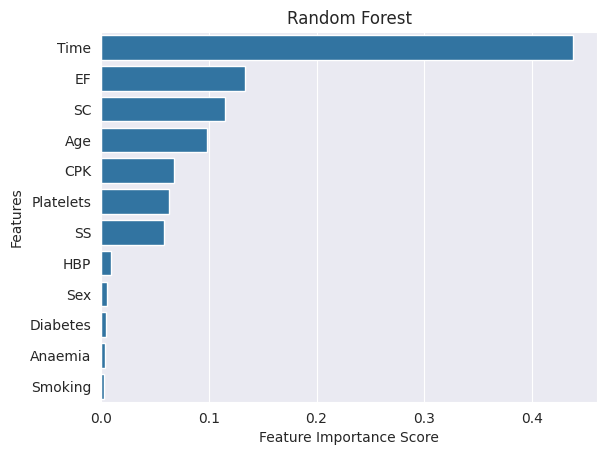

In [ ]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set_style("darkgrid")
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Random Forest")
# plt.legend()
plt.show()


**Decision Tree Classifier**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
acc = dt.score(X_test, y_test)
y_pred = dt.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))

Accuracy: 0.7640449438202247
f1: 0.7640449438202247
precision_score: 0.7640449438202247
recall_score: 0.7640449438202247
log_loss: 8.504682260353485


In [ ]:
feature_imp = pd.Series(dt.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

,0
Time,0.467047
CPK,0.136864
SC,0.107635
Platelets,0.068381
EF,0.067783
SS,0.060860
HBP,0.039891
Age,0.027223
Diabetes,0.024315
Anaemia,0.000000


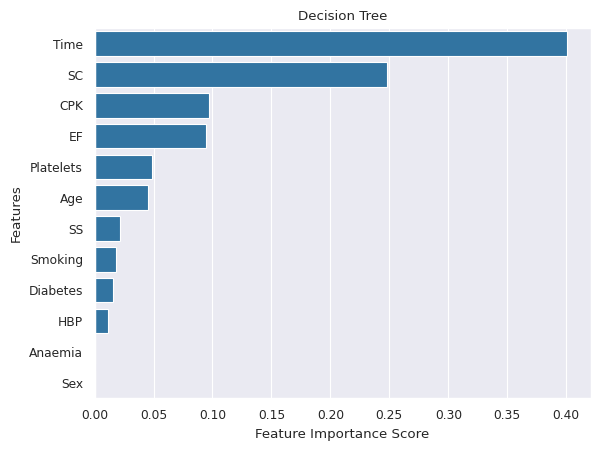

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set_style("darkgrid")
sns.set_context("paper")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Decision Tree")
plt.savefig("DT.png")
# plt.legend()
plt.show()

**Gradient Boosting Classifier**

In [ ]:
%%time
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

gb = GradientBoostingClassifier(n_estimators=100)

gb.fit(X_train, y_train)
acc = gb.score(X_test, y_test)
y_pred = gb.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))


Accuracy: 0.8111111111111111
f1: 0.8111111111111111
precision_score: 0.8111111111111111
recall_score: 0.8111111111111111
log_loss: 6.808245640166573
CPU times: user 249 ms, sys: 2.83 ms, total: 251 ms
Wall time: 285 ms


In [ ]:
feature_imp = pd.Series(gb.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

,0
Time,0.496425
SC,0.139257
EF,0.110922
CPK,0.071032
SS,0.060452
Age,0.059810
Platelets,0.043668
Sex,0.008966
HBP,0.006570
Anaemia,0.001709


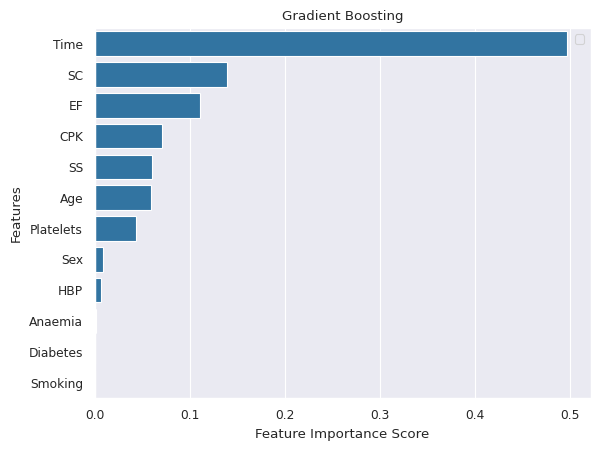

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set_style("darkgrid")
sns.set_context("paper")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Gradient Boosting")
plt.legend()
plt.savefig("GB.png")
plt.show()

**SVM**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)
acc = svc.score(X_test, y_test)
y_pred = svc.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))


Accuracy: 0.6777777777777778
f1: 0.6777777777777778
precision_score: 0.6777777777777778
recall_score: 0.6777777777777778
log_loss: 11.61406609204886


**KNN**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))


Accuracy: 0.6333333333333333
f1: 0.6333333333333333
precision_score: 0.6333333333333333
recall_score: 0.6333333333333333
log_loss: 13.216006242676293


**Logistic Regression**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
lr = LogisticRegression()
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))

Accuracy: 0.7888888888888889
f1: 0.7888888888888889
precision_score: 0.7888888888888889
recall_score: 0.7888888888888889
log_loss: 7.609215715480287


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#**Hyperparameter tuning and Optimization**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# # Load dataset
# data = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(
#     data.data, data.target, test_size=0.2, random_state=42
# )

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best parameters: {grid_search.best_params_}")
print(
  f"Best cross-validation accuracy: {grid_search.best_score_:.2f}"
  )

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 80}
Best cross-validation accuracy: 0.85


**RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# # Load dataset
# data = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(
#     data.data, data.target, test_size=0.2, random_state=42
# )

# Hyperparameter distribution
param_dist = {
    'n_estimators': np.linspace(50, 200, num=10, dtype=int),
    'max_depth': [None] + list(np.arange(5, 25, 5)),
    'min_samples_split': np.arange(2, 11)
}

# Random Search
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best parameters: {random_search.best_params_}")
print(
  f"Best cross-validation accuracy: {random_search.best_score_:.2f}"
  )

Best parameters: {'n_estimators': 166, 'min_samples_split': 8, 'max_depth': 5}
Best cross-validation accuracy: 0.87


**Bayesian Optimization with Optuna**

In [ ]:
!pip3 install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# # Load dataset
# data = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(
#     data.data, data.target, test_size=0.2, random_state=42
# )

# Objective function
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    score = cross_val_score(rf, X_train, y_train,
                            cv=3, scoring='accuracy', n_jobs=-1)
    return score.mean()

# Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Best parameters and acc'n_uracy
print(f"Best parameters: {study.best_params}")
print(f"Best cross-validation accuracy: {study.best_value:.2f}")


[I 2024-10-26 19:53:08,267] A new study created in memory with name: no-name-9e0805fa-eb1c-4908-9749-d0f4c1b2395b
[I 2024-10-26 19:53:08,812] Trial 0 finished with value: 0.8535805626598466 and parameters: {'n_estimators': 116, 'max_depth': 5, 'min_samples_split': 7}. Best is trial 0 with value: 0.8535805626598466.
[I 2024-10-26 19:53:09,567] Trial 1 finished with value: 0.8437766410912192 and parameters: {'n_estimators': 177, 'max_depth': 7, 'min_samples_split': 6}. Best is trial 0 with value: 0.8535805626598466.
[I 2024-10-26 19:53:10,220] Trial 2 finished with value: 0.8534384768400113 and parameters: {'n_estimators': 146, 'max_depth': 22, 'min_samples_split': 4}. Best is trial 0 with value: 0.8535805626598466.
[I 2024-10-26 19:53:11,113] Trial 3 finished with value: 0.8438476840011367 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5}. Best is trial 0 with value: 0.8535805626598466.
[I 2024-10-26 19:53:11,773] Trial 4 finished with value: 0.8583404376243

Best parameters: {'n_estimators': 148, 'max_depth': 23, 'min_samples_split': 4}
Best cross-validation accuracy: 0.86
